In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pycountry
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load cleaned dataset
data2 = pd.read_csv("C:\\Users\\Arboy\\Desktop\\Capstone\\cleaned_data.csv")


In [14]:
data2.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides100kPop', 'GdpForYear', 'GdpPerCapital', 'Generation'],
      dtype='object')

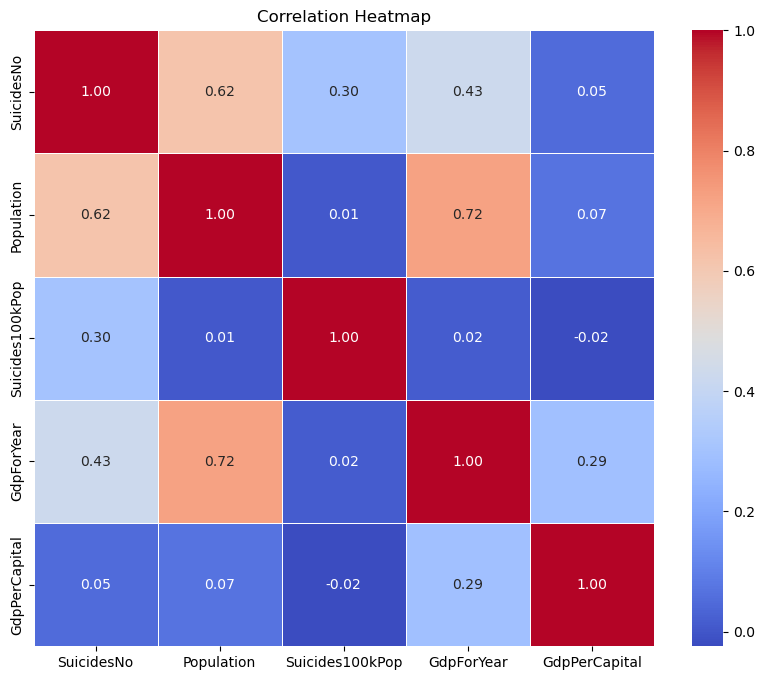

In [17]:
#HeatMap
numerical_cols = ['SuicidesNo', 'Population', 'Suicides100kPop', 'GdpForYear', 'GdpPerCapital']

correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

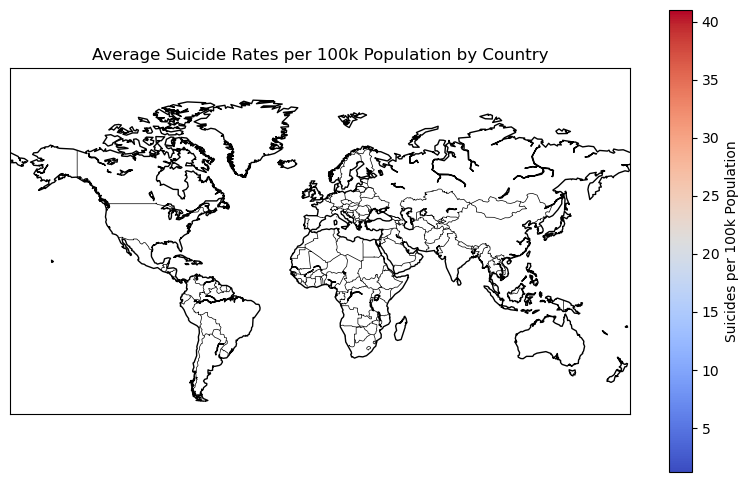

In [25]:
#MAP CHART
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

suicide_rates = data.groupby('Country')['Suicides100kPop'].mean().reset_index()

plt.figure(figsize=(10, 6))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

m.drawcoastlines()
m.drawcountries()

for index, row in suicide_rates.iterrows():
    try:
        country = pycountry.countries.get(name=row['Country'])
        if country:
            country_alpha_2 = country.alpha_2
            country_info = m.borders()
            country_coords = [c for c in country_info if c['properties']['iso_a2'] == country_alpha_2][0]['coordinates'][0]
            country_lon, country_lat = zip(*country_coords)
            country_x, country_y = m(country_lon, country_lat)
            color = 'red'  # Default color
            if row['Suicides100kPop'] < 0:
                color = 'green'
            elif row['Suicides100kPop'] < 1:
                color = 'yellow'
            elif row['Suicides100kPop'] < 5:
                color = 'orange'
            m.fill(country_x, country_y, color=color, edgecolor='k', linewidth=0.5)
            plt.text(country_x[0], country_y[0], str(round(row['Suicides100kPop'], 2)), fontsize=8, ha='center', color='black')
    except AttributeError:
        pass

norm = Normalize(vmin=suicide_rates['Suicides100kPop'].min(), vmax=suicide_rates['Suicides100kPop'].max())
sm = ScalarMappable(norm=norm, cmap='coolwarm')
sm.set_array([])
plt.colorbar(sm, orientation='vertical', label='Suicides per 100k Population')

plt.title('Average Suicide Rates per 100k Population by Country')
plt.show()

In [26]:
#Correlation of GdpPerCapital vs Suicides per 100K Population
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(data['GdpPerCapital'], data['Suicides100kPop'])

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)

Slope: -3.3977986736890455e-05
Intercept: 15.561759038307084
R-squared: 0.001350625900665356
P-value: 2.9281402832676013e-05


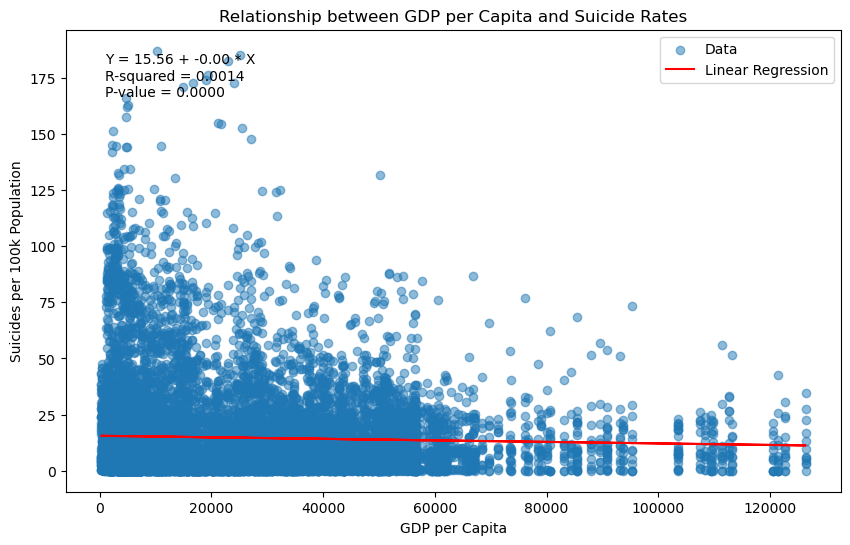

In [31]:
#Visualization of Correlation
slope, intercept, r_value, p_value, std_err = linregress(data['GdpPerCapital'], data['Suicides100kPop'])

plt.figure(figsize=(10, 6))
plt.scatter(data['GdpPerCapital'], data['Suicides100kPop'], alpha=0.5, label='Data')

plt.plot(data['GdpPerCapital'], intercept + slope * data['GdpPerCapital'], color='red', label='Linear Regression')

plt.xlabel('GDP per Capita')
plt.ylabel('Suicides per 100k Population')
plt.title('Relationship between GDP per Capita and Suicide Rates')
plt.legend()

equation = f'Y = {intercept:.2f} + {slope:.2f} * X\nR-squared = {r_value**2:.4f}\nP-value = {p_value:.4f}'
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()

In [36]:
#Standardization of Data of GdpPerCapital vs Suicides per 100K Population
selected_columns = ['GdpPerCapital', 'Suicides100kPop']

selected_data = data[selected_columns]

scaler = StandardScaler()
standardized_data = scaler.fit_transform(selected_data)

standardized_df = pd.DataFrame(standardized_data, columns=selected_columns)

correlation_matrix = standardized_df.corr()

print(correlation_matrix)

                 GdpPerCapital  Suicides100kPop
GdpPerCapital         1.000000        -0.036751
Suicides100kPop      -0.036751         1.000000


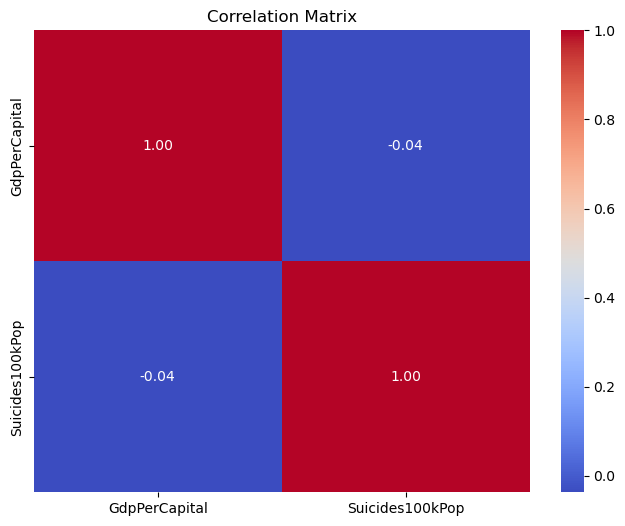

In [37]:
#Visualization of the Correlation of the Standarized GdpPerCapital vs Suicides per 100K Population
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [80]:
# Correlation of GDP and Suicide rate per Country
country_correlations = {}

for country in distinct_countries:
    country_data = data[data['Country'] == country]
    correlation = country_data['GdpPerCapital'].corr(country_data['Suicides100kPop'])
    country_correlations[country] = correlation

# Print all countries and their correlation coefficients
print("\nCorrelation coefficient between GdpPerCapital and Suicide Rate per Country:")
for country, correlation in country_correlations.items():
    print(f"{country}: {correlation}")

# Check if any correlation coefficient exceeds 0.4 or falls below -0.4
high_correlation_countries = [country for country, correlation in country_correlations.items() if abs(correlation) > 0.4]

if high_correlation_countries:
    print("\nCountries with correlation coefficient exceeding 0.4 or falling below -0.4:", high_correlation_countries)
else:
    print("\nNo countries have correlation coefficient exceeding 0.4 or falling below -0.4")


Correlation coefficient between GdpPerCapital and Suicide Rate per Country:
Argentina: -0.07303540560100603
Austria: -0.12283456766729041
Belgium: -0.10399209920602172
Belize: -0.023449816809190026
Brazil: 0.012319151316072289
Bulgaria: -0.19438969124321312
Chile: 0.06622648286400028
Colombia: -0.059673162679852336
Costa Rica: -0.04109758149438937
Croatia: -0.11103916279688823
Cuba: -0.14194073169304158
Czechia: -0.109138944977772
Denmark: -0.1555334208210657
Ecuador: 0.06306280545433113
El Salvador: -0.08129704215102113
Estonia: -0.2593280961587892
Finland: -0.17545013339842044
France: -0.09330687581589168
Germany: -0.10466005893776958
Greece: -0.020500792131460867
Guatemala: 0.12972908631015143
Hungary: -0.16368507422572331
Iceland: -0.014852421814100217
Ireland: -0.07939841763334735
Israel: -0.11233212756565754
Italy: -0.10144574893261243
Japan: -0.057448440887935916
Kazakhstan: -0.17031176459003314
Kuwait: -0.04884216892516101
Kyrgyzstan: -0.1852767589597282
Latvia: -0.20609336778

In [81]:
age_correlations = {}

# Grouping data by 'Age' and 'Country' and calculating correlation coefficient
for age_group in distinct_Ages:
    age_data = data[data['Age'] == age_group]
    correlation = age_data['GdpPerCapital'].corr(age_data['Suicides100kPop'])
    age_correlations[age_group] = correlation

# Print correlation coefficient per age group
print("\nCorrelation coefficient between GdpPerCapital and Suicide Rate per Age Group:")
for age_group, correlation in age_correlations.items():
    print(f"{age_group}: {correlation}")


Correlation coefficient between GdpPerCapital and Suicide Rate per Age Group:
75+ years: -0.014828270883968602
55-74 years: -0.03659862097973329
35-54 years: -0.04438482704041219
25-34 years: -0.08283646315999982
15-24 years: -0.10261588650083388
5-14 years: -0.23842026871863242


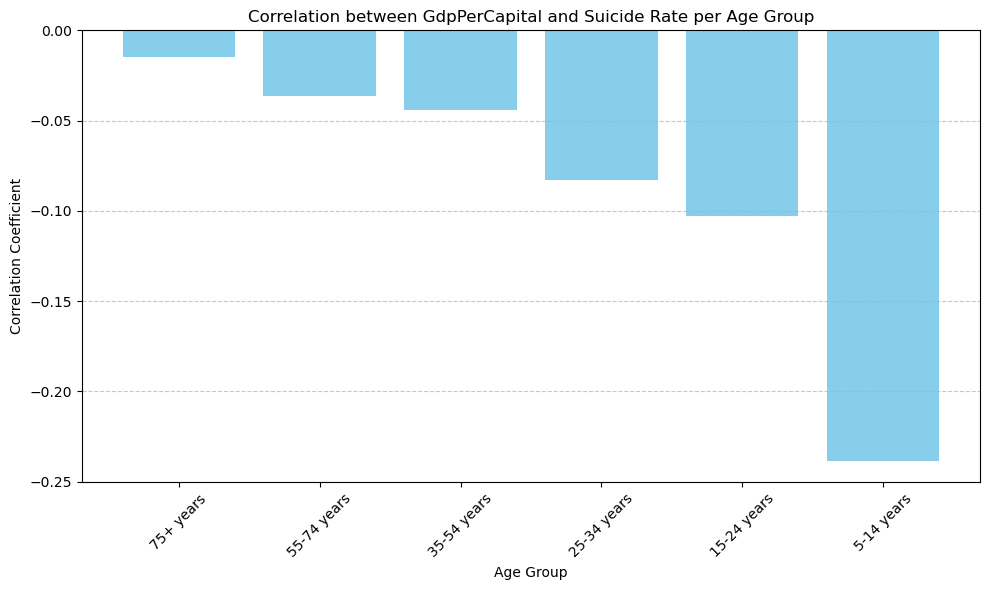

In [82]:
import matplotlib.pyplot as plt

# Extracting age groups and their corresponding correlation coefficients
age_groups = list(age_correlations.keys())
correlation_coefficients = list(age_correlations.values())

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(age_groups, correlation_coefficients, color='skyblue')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation between GdpPerCapital and Suicide Rate per Age Group')

# Displaying the plot
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
from scipy.stats import ttest_ind

# Load cleaned dataset with specified column names
data4 = pd.read_csv("C:\\Users\\Arboy\\Desktop\\Capstone\\cleaned_data.csv", 
                   usecols=['Country', 'Gender', 'Suicides100kPop'])

# Group data by gender and sum the suicides per 100k population
suicides_per_100k = data.groupby('Gender')['Suicides100kPop'].sum()

print("Total suicides per 100k population:")
print(suicides_per_100k)

# Perform T-test to compare suicide rates between genders
male_suicides = data[data['Gender'] == 'male']['Suicides100kPop']
female_suicides = data[data['Gender'] == 'female']['Suicides100kPop']

t_statistic, p_value = ttest_ind(male_suicides, female_suicides)

print("\nT-test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Total suicides per 100k population:
Gender
female     39660.48
male      151669.71
Name: Suicides100kPop, dtype: float64

T-test Results:
T-statistic: 54.08155467696647
P-value: 0.0


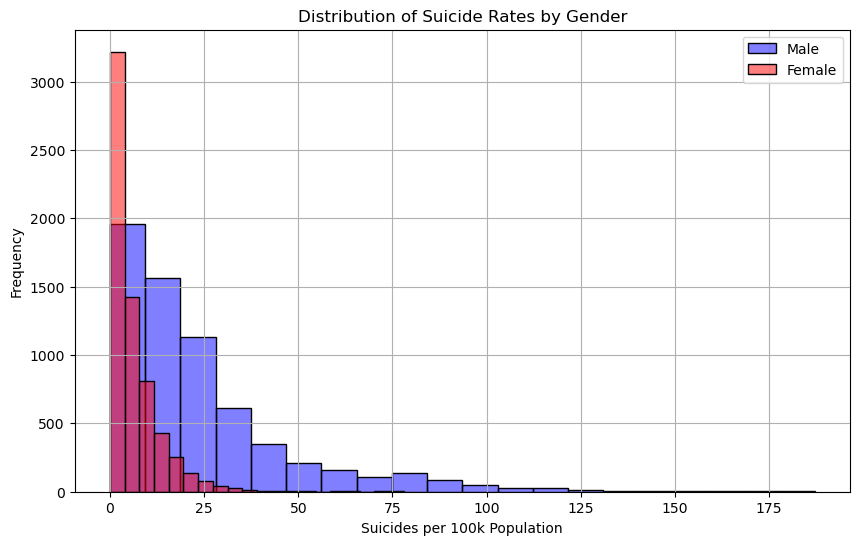

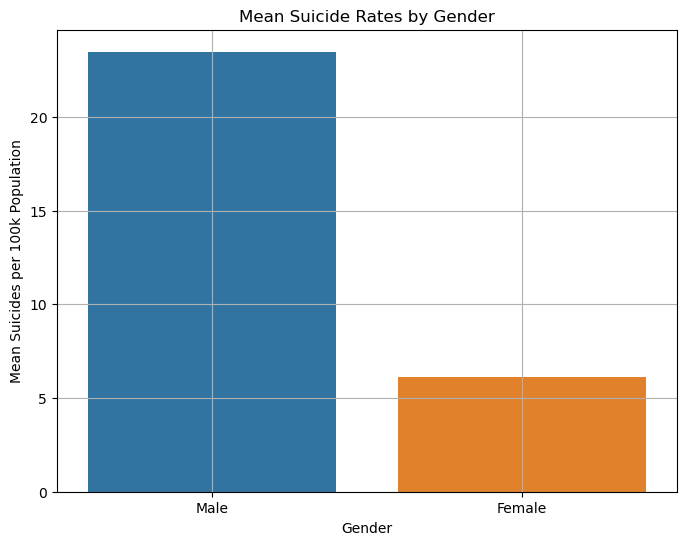


T-test Results:
T-statistic: 54.08155467696647
P-value: 0.0


In [58]:
male_data = data[data['Gender'] == 'male']
female_data = data[data['Gender'] == 'female']

plt.figure(figsize=(10, 6))
sns.histplot(data=male_data['Suicides100kPop'], bins=20, color='blue', alpha=0.5, label='Male')
sns.histplot(data=female_data['Suicides100kPop'], bins=20, color='red', alpha=0.5, label='Female')
plt.title('Distribution of Suicide Rates by Gender')
plt.xlabel('Suicides per 100k Population')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

t_statistic, p_value = ttest_ind(male_data['Suicides100kPop'], female_data['Suicides100kPop'])

plt.figure(figsize=(8, 6))
sns.barplot(x=['Male', 'Female'], y=[male_data['Suicides100kPop'].mean(), female_data['Suicides100kPop'].mean()])
plt.title('Mean Suicide Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Suicides per 100k Population')
plt.grid(True)
plt.show()

print("\nT-test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

In [59]:
#Results:
#No. 1 Even though there was a negative correlation between the GDP per capita and the No.of Suicides per 100k Population, its level is very small or highly insignificant.  Thus, it can be concluded that there is no significant correlation between the GDP and the No. of Suicides
#No. 2 Even though there was a negative correlation between the GDP per capita and the No.of Suicides per 100k Population per age group, its level is small (near zero) or insignificant.  Thus, it can be concluded that there is no significant correlation between the GDP and the No. of Suicides even on the age group level.
#No. 3 There is significant difference in the suicdes of males and females.